In [24]:
import pandas as pd


In [7]:
!unzip -o project_snapshot.zip -d /content


Archive:  project_snapshot.zip
   creating: /content/content/app/
  inflating: /content/content/app/transforms.py  
  inflating: /content/content/app/data_loader.py  
   creating: /content/content/app/__pycache__/
  inflating: /content/content/app/__pycache__/data_loader.cpython-312.pyc  
  inflating: /content/content/app/__pycache__/transforms.cpython-312.pyc  
   creating: /content/content/data/
   creating: /content/content/data/derived/
  inflating: /content/content/data/derived/weekly_spatial_last4y_dense_ranked.csv  
  inflating: /content/content/data/derived/weekly_spatial_2024_dense_ranked.csv  
  inflating: /content/content/data/derived/weekly_spatial_full_history_dense_ranked.csv  
   creating: /content/content/data/metrics/
  inflating: /content/content/data/metrics/weekly_master_last4y_2021_2024.csv  
  inflating: /content/content/data/metrics/weekly_master_full_2018_2024.csv  
  inflating: /content/content/data/metrics/weekly_master_2024.csv  
   creating: /content/content

In [10]:
!mv /content/content/* /content/
!rmdir /content/content


In [5]:
import sys
sys.path.append("/content")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Visualization configuration
# -----------------------------
SUITABILITY_CMAP = "RdYlGn"
TEMPERATURE_CMAP = "coolwarm"

from matplotlib.colors import LinearSegmentedColormap

HUMIDITY_CMAP = LinearSegmentedColormap.from_list(
    "BeigeToBlue",
    ["#f5f5dc", "#08306b"]  # beige → deep blue
)




In [4]:
from app.data_loader import load_with_sites
from app.transforms import build_site_week_matrix
print("Imports work")


Imports work


In [1]:
# -----------------------------
# TRANSFORMS + DATA SCHEMA TEST
# -----------------------------

from app.data_loader import load_with_sites
from app.transforms import aggregate_site_week, build_site_week_matrix

# Load full weekly dataset
df = load_with_sites(kind="metrics", window="full")

print("Loaded weekly dataset")
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

# ---- Test 1: Temperature mean aggregation ----
print("\nTesting temperature aggregation (t2m_mean_08_18)...")

temp_agg = aggregate_site_week(
    df,
    value_col="t2m_mean_08_18",
    agg="mean"
)

print("Aggregated rows:", temp_agg.shape)

temp_matrix = build_site_week_matrix(
    temp_agg,
    value_col="t2m_mean_08_18"
)

print("Temperature matrix shape:", temp_matrix.shape)
print("Temperature matrix preview:")
display(temp_matrix.head())

# ---- Test 2: Humidity mean aggregation ----
print("\nTesting humidity aggregation (rh_mean_08_18)...")

hum_agg = aggregate_site_week(
    df,
    value_col="rh_mean_08_18",
    agg="mean"
)

hum_matrix = build_site_week_matrix(
    hum_agg,
    value_col="rh_mean_08_18"
)

print("Humidity matrix shape:", hum_matrix.shape)
print("Humidity matrix preview:")
display(hum_matrix.head())

print("\n✅ TRANSFORMS TEST COMPLETE")


DEBUG columns after normalization: ['site_id', 'year', 'week_index', 'start_date', 't2m_08', 't2m_mean_08_18', 't2m_min_08_18', 't2m_max_08_18', 't2m_absmax_08_18', 't2m_absmin_08_18', 'rh_08', 'rh_mean_08_18', 'rh_absmax_08_18', 'wind_mean', 'wind_min', 'wind_max', 'wind_absmax', 'n_obs', 'n_days', 'pct_t2m_08_18', 'pct_rh_08_18', 'pct_wind_max', 'pct_viability']
Loaded weekly dataset
Shape: (24752, 26)

Columns:
['site_id', 'year', 'week_bin', 'start_date', 't2m_08', 't2m_mean_08_18', 't2m_min_08_18', 't2m_max_08_18', 't2m_absmax_08_18', 't2m_absmin_08_18', 'rh_08', 'rh_mean_08_18', 'rh_absmax_08_18', 'wind_mean', 'wind_min', 'wind_max', 'wind_absmax', 'n_obs', 'n_days', 'pct_t2m_08_18', 'pct_rh_08_18', 'pct_wind_max', 'pct_viability', 'site_name', 'lat', 'long']

Testing temperature aggregation (t2m_mean_08_18)...
Aggregated rows: (3536, 3)
Temperature matrix shape: (68, 52)
Temperature matrix preview:


week_bin,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
site_name,,,,,,,,,,,,,,,,,,,,,
BROKEN BOW II,-2.252342,-1.654156,-3.413873,-1.471111,-0.032107,-2.023637,-2.245965,-1.378683,4.847219,4.353866,...,10.416265,9.732770,8.279179,7.113979,5.686447,2.551997,2.717990,0.450267,1.448601,-0.172946
BULLDOG WIND,-3.231275,-2.436831,-7.175681,-3.815586,-2.991542,-3.402432,-3.690475,-0.314256,4.661109,4.803448,...,11.336437,9.924266,8.742247,5.163704,5.341645,2.114306,2.195333,0.671193,0.480768,0.700332
CARLETON COLLEGE,-6.408410,-6.043729,-8.532101,-7.502323,-8.067028,-7.915530,-8.219049,-5.075016,-1.689086,1.039550,...,8.871114,7.427261,5.978822,2.180368,1.426239,-1.274933,-1.915944,-3.031298,-4.018146,-3.223721
CEDAR SPRINGS II-TPO 99,-3.333148,-2.222732,-2.072073,-2.693324,-1.489622,-4.326236,-4.366255,-5.527550,0.620535,1.196391,...,6.846388,5.529745,4.566702,4.643053,2.927201,0.282557,1.504109,-1.186176,-0.213002,-1.164146
CEDAR SPRINGS II-TPO57N,-3.454596,-2.448656,-2.243036,-2.920360,-1.727152,-4.493079,-4.579645,-5.792951,0.320901,1.034935,...,6.713440,5.322789,4.433480,4.516147,2.745340,0.100329,1.331733,-1.352741,-0.316031,-1.339372



Testing humidity aggregation (rh_mean_08_18)...
Humidity matrix shape: (68, 52)
Humidity matrix preview:


week_bin,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
site_name,,,,,,,,,,,,,,,,,,,,,
BROKEN BOW II,68.979800,61.808757,59.432288,69.586613,58.449549,57.175956,54.627945,56.391953,46.168076,52.757441,...,52.204016,49.843282,52.101144,46.158311,49.202124,59.189182,54.701779,61.611096,52.867290,68.297558
BULLDOG WIND,67.552944,67.351271,76.747303,78.885953,67.094668,60.355217,59.633677,60.314346,53.337831,59.851507,...,57.880762,58.191979,60.957027,57.200891,58.369882,60.811384,62.808428,66.567021,62.298315,71.019461
CARLETON COLLEGE,74.835677,73.214469,72.608464,78.145278,73.774949,70.958179,70.349478,71.570602,68.196359,63.960321,...,61.659654,62.509674,63.827044,63.810569,66.215025,63.815844,71.535267,72.372658,69.860729,78.692809
CEDAR SPRINGS II-TPO 99,63.591812,60.415037,60.264064,67.394182,59.727244,62.090213,59.568271,61.538074,52.573222,55.481794,...,54.383750,54.287659,52.889207,49.086157,48.096332,56.141081,52.629089,58.476714,53.349262,58.143195
CEDAR SPRINGS II-TPO57N,63.457087,60.939563,60.515548,67.666164,60.231998,62.627502,60.153338,62.299879,53.278528,55.615142,...,54.322133,54.619792,52.803081,48.910755,48.149364,56.184006,52.926266,58.514217,53.265460,58.289922



✅ TRANSFORMS TEST COMPLETE


In [3]:
import sys
sys.path.append("/content")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


DEBUG columns after normalization: ['site_id', 'year', 'week_index', 'start_date', 't2m_08', 't2m_mean_08_18', 't2m_min_08_18', 't2m_max_08_18', 't2m_absmax_08_18', 't2m_absmin_08_18', 'rh_08', 'rh_mean_08_18', 'rh_absmax_08_18', 'wind_mean', 'wind_min', 'wind_max', 'wind_absmax', 'n_obs', 'n_days', 'pct_t2m_08_18', 'pct_rh_08_18', 'pct_wind_max', 'pct_viability']


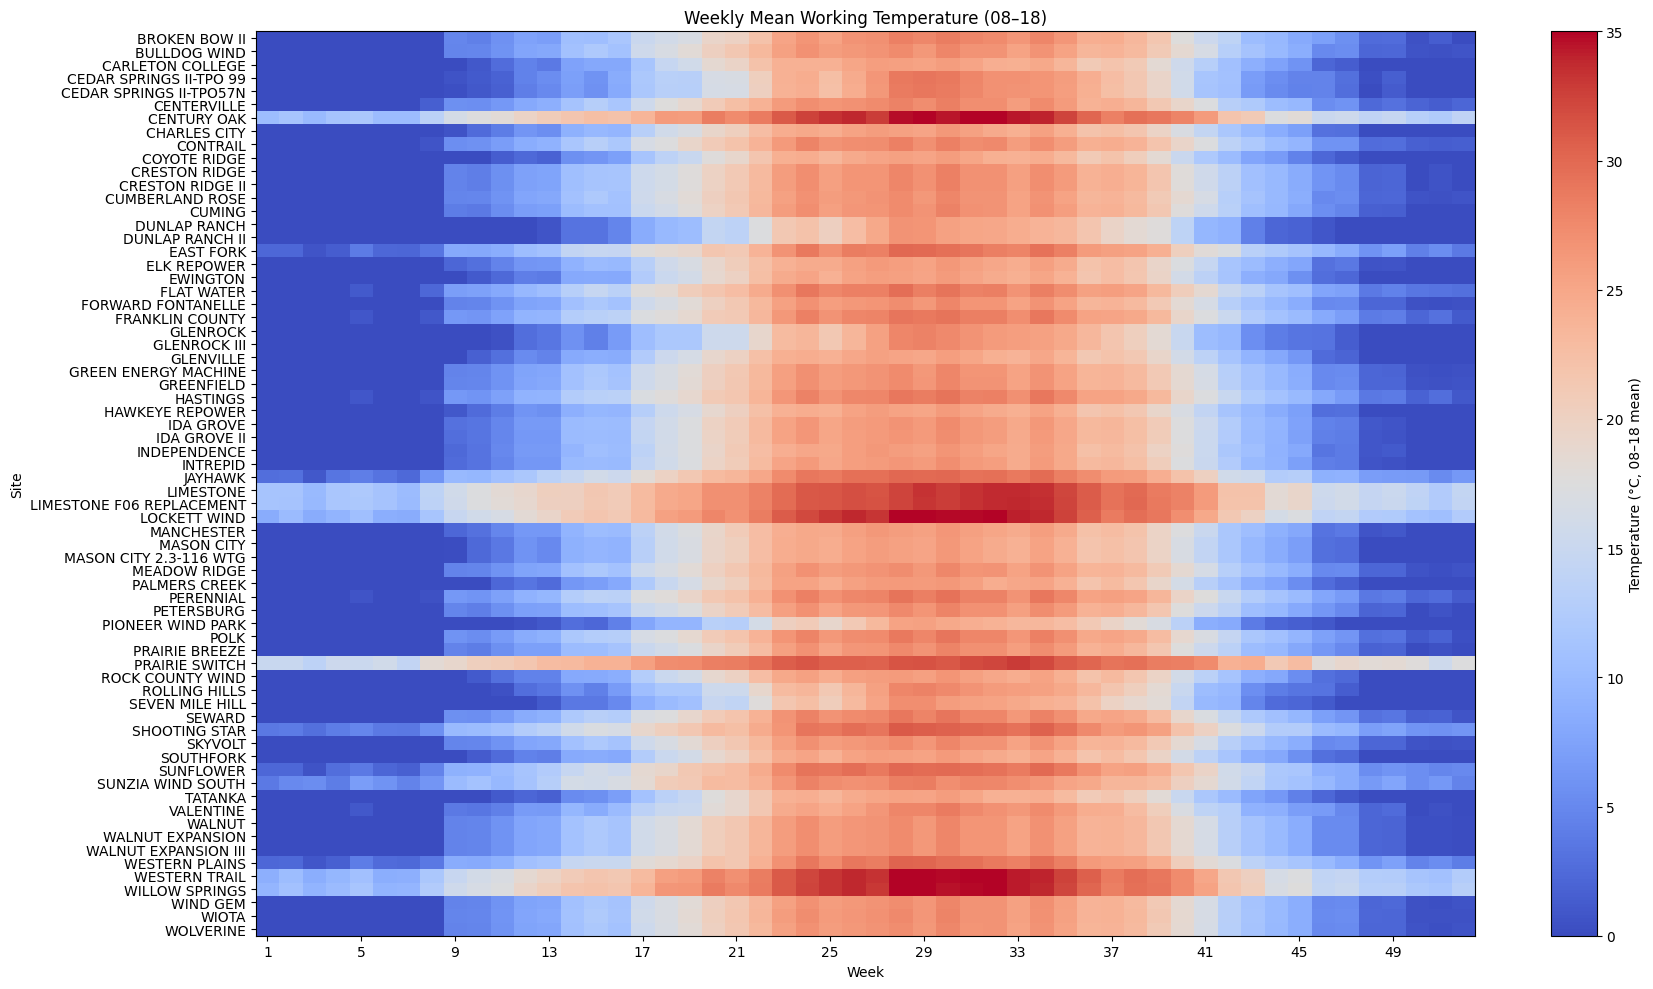

In [6]:
# -----------------------------
# TEMPERATURE HEATMAP
# -----------------------------

# Load weekly metrics with site names
df = load_with_sites(kind="metrics", window="full")

# Aggregate weekly temperature (mean working hours temp)
temp_agg = aggregate_site_week(
    df,
    value_col="t2m_mean_08_18",
    agg="mean"
)

# Build site × week matrix
temp_matrix = build_site_week_matrix(
    temp_agg,
    value_col="t2m_mean_08_18"
)

# Ensure consistent alphabetical ordering
temp_matrix = temp_matrix.sort_index()

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(18, 10))

im = plt.imshow(
    temp_matrix.values,
    aspect="auto",
    cmap=TEMPERATURE_CMAP,
    vmin=0,    # cold end (blue)
    vmax=35   # hot end (red)
)

plt.colorbar(im, label="Temperature (°C, 08–18 mean)")

plt.xticks(
    ticks=np.arange(0, temp_matrix.shape[1], 4),
    labels=temp_matrix.columns[::4]
)
plt.yticks(
    ticks=np.arange(temp_matrix.shape[0]),
    labels=temp_matrix.index
)

plt.xlabel("Week")
plt.ylabel("Site")
plt.title("Weekly Mean Working Temperature (08–18)")

plt.tight_layout()
plt.show()


DEBUG columns after normalization: ['site_id', 'year', 'week_index', 'start_date', 't2m_08', 't2m_mean_08_18', 't2m_min_08_18', 't2m_max_08_18', 't2m_absmax_08_18', 't2m_absmin_08_18', 'rh_08', 'rh_mean_08_18', 'rh_absmax_08_18', 'wind_mean', 'wind_min', 'wind_max', 'wind_absmax', 'n_obs', 'n_days', 'pct_t2m_08_18', 'pct_rh_08_18', 'pct_wind_max', 'pct_viability']


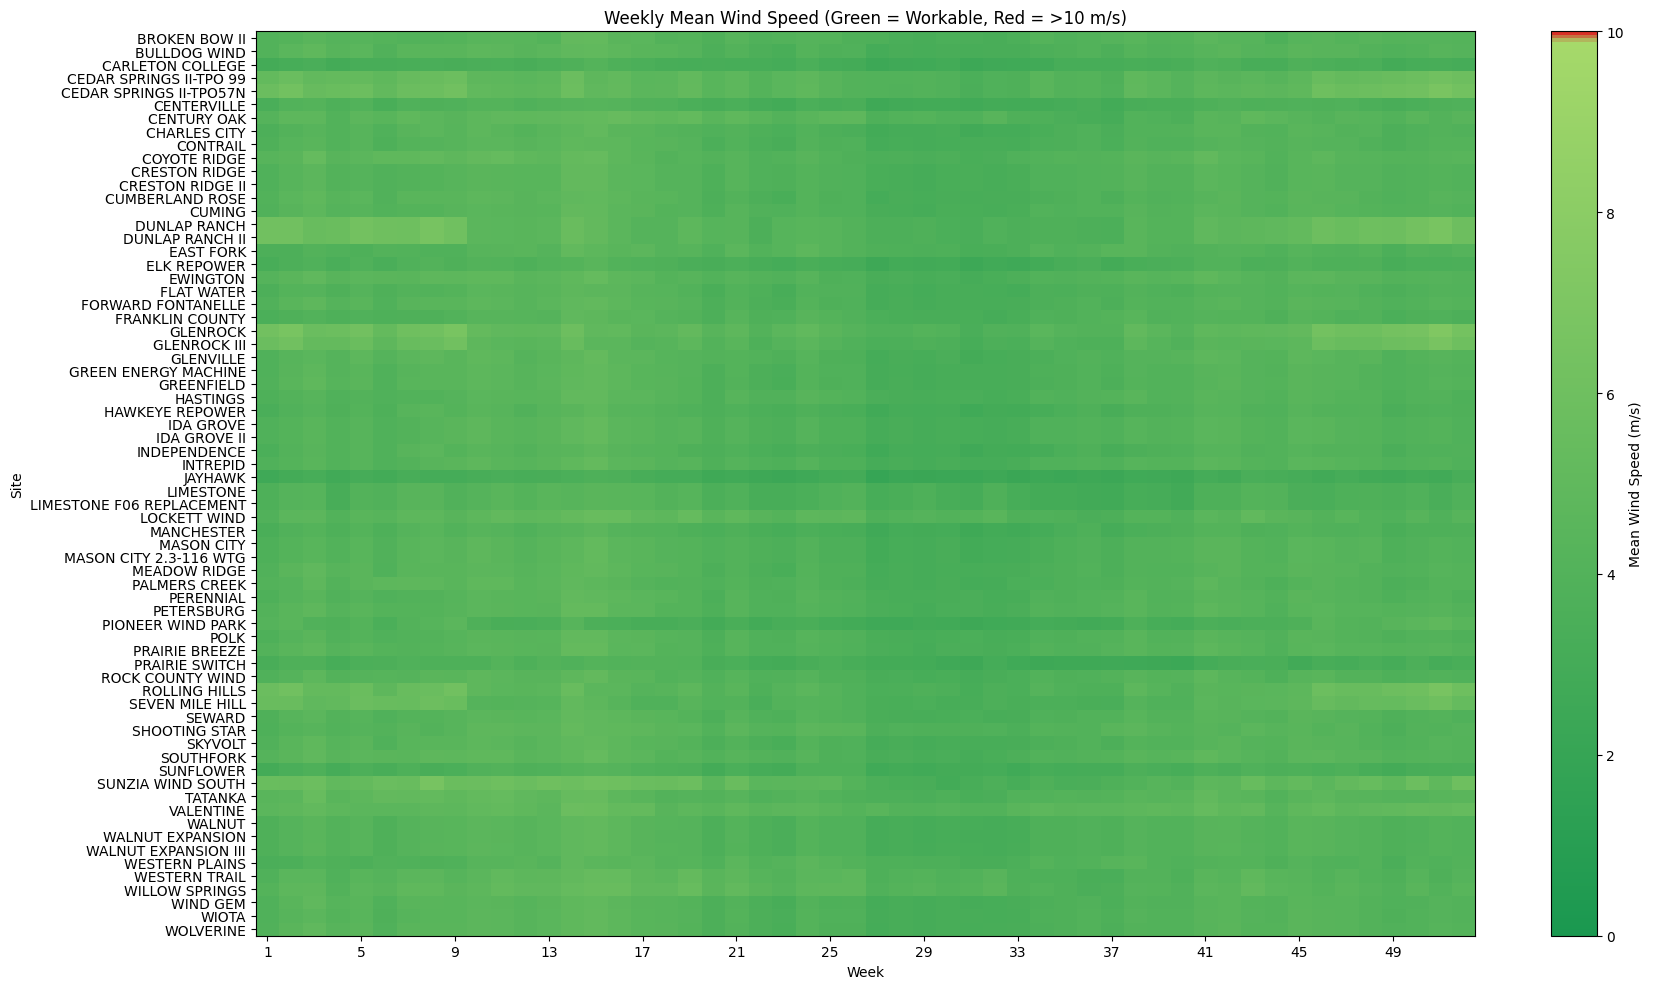

In [9]:
# -----------------------------
# WIND HEATMAP (WORKABLE THRESHOLD)
# -----------------------------

from matplotlib.colors import LinearSegmentedColormap

# Custom colormap:
# dark green (calm) → light green (near limit) → red (not workable)
WIND_CMAP = LinearSegmentedColormap.from_list(
    "WindWorkable",
    [
        (0.0, "#1a9850"),   # dark green (0 m/s)
        (0.99, "#a6d96a"),  # light green (~9.9 m/s)
        (1.0, "#d73027"),   # red (≥10 m/s)
    ]
)

# Load weekly metrics
df = load_with_sites(kind="metrics", window="full")

# Aggregate weekly mean wind
wind_agg = aggregate_site_week(
    df,
    value_col="wind_mean",
    agg="mean"
)

# Build site × week matrix
wind_matrix = build_site_week_matrix(
    wind_agg,
    value_col="wind_mean"
).sort_index()

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(18, 10))

im = plt.imshow(
    wind_matrix.values,
    aspect="auto",
    cmap=WIND_CMAP,
    vmin=0,
    vmax=10   # hard cutoff: ≥10 m/s saturates red
)

plt.colorbar(im, label="Mean Wind Speed (m/s)")

plt.xticks(
    ticks=np.arange(0, wind_matrix.shape[1], 4),
    labels=wind_matrix.columns[::4]
)
plt.yticks(
    ticks=np.arange(wind_matrix.shape[0]),
    labels=wind_matrix.index
)

plt.xlabel("Week")
plt.ylabel("Site")
plt.title("Weekly Mean Wind Speed (Green = Workable, Red = >10 m/s)")

plt.tight_layout()
plt.show()


DEBUG columns after normalization: ['site_id', 'year', 'week_index', 'start_date', 't2m_08', 't2m_mean_08_18', 't2m_min_08_18', 't2m_max_08_18', 't2m_absmax_08_18', 't2m_absmin_08_18', 'rh_08', 'rh_mean_08_18', 'rh_absmax_08_18', 'wind_mean', 'wind_min', 'wind_max', 'wind_absmax', 'n_obs', 'n_days', 'pct_t2m_08_18', 'pct_rh_08_18', 'pct_wind_max', 'pct_viability']


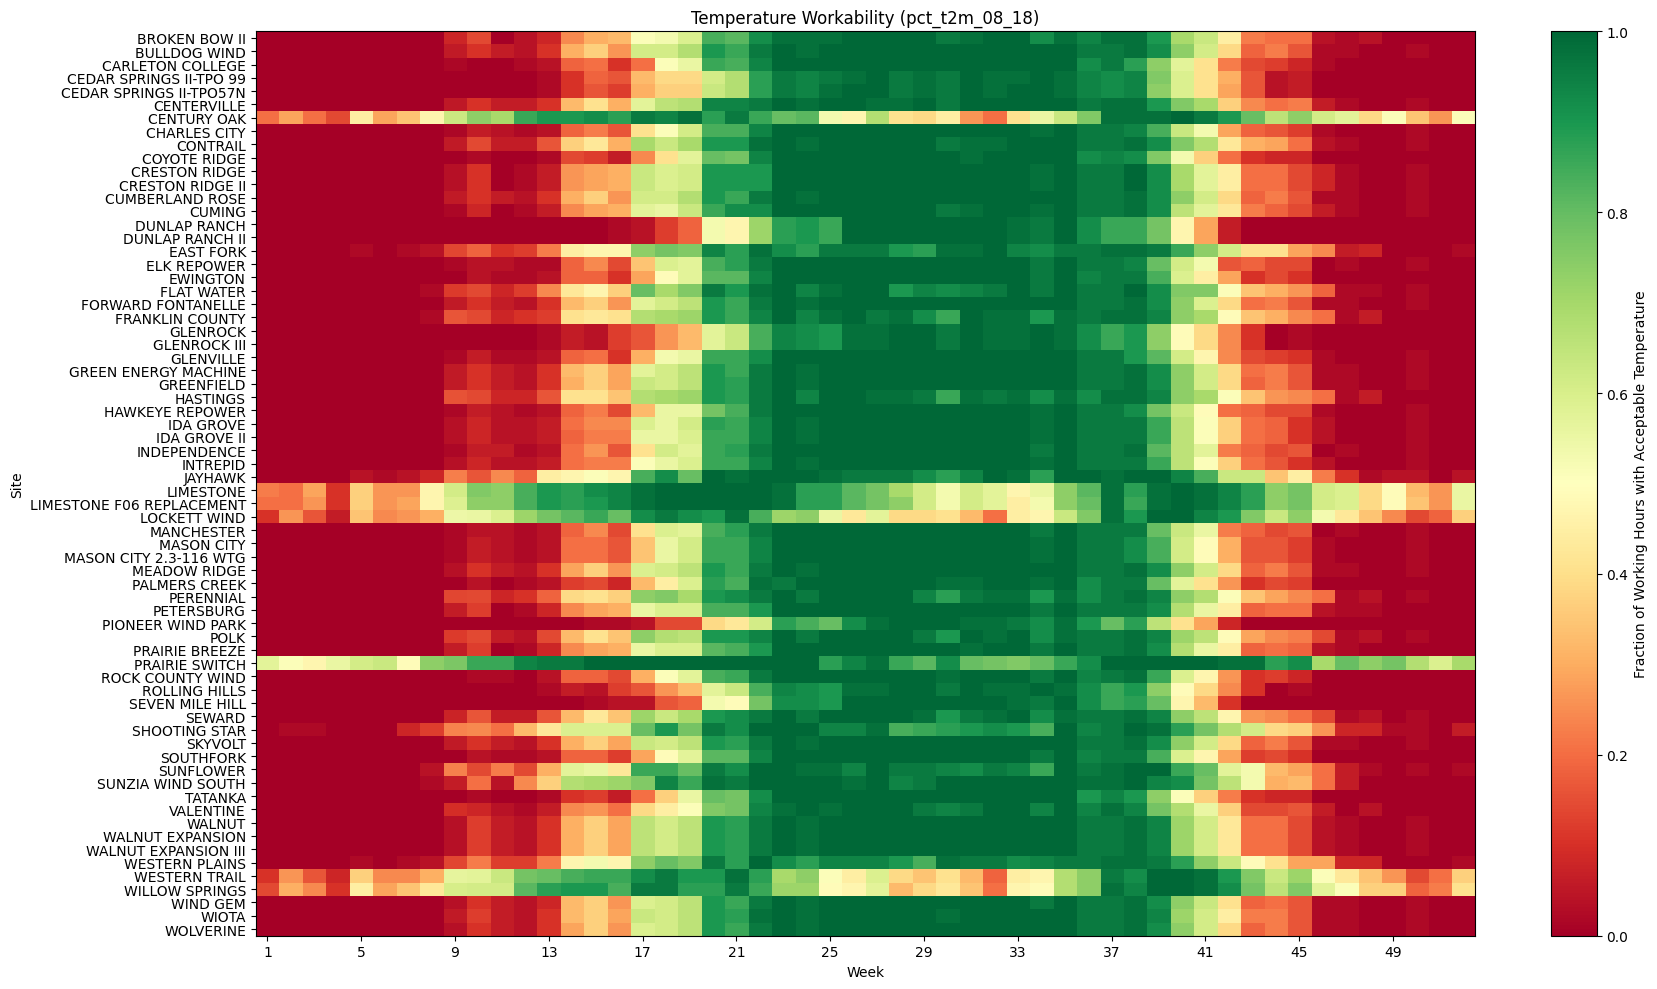

In [10]:
# -----------------------------
# PCT_T2M_08_18 HEATMAP
# -----------------------------

# Load weekly metrics with site names
df = load_with_sites(kind="metrics", window="full")

# Aggregate weekly pct temperature viability
pct_t2m_agg = aggregate_site_week(
    df,
    value_col="pct_t2m_08_18",
    agg="mean"
)

# Build site × week matrix
pct_t2m_matrix = build_site_week_matrix(
    pct_t2m_agg,
    value_col="pct_t2m_08_18"
)

# Ensure consistent alphabetical ordering
pct_t2m_matrix = pct_t2m_matrix.sort_index()

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(18, 10))

im = plt.imshow(
    pct_t2m_matrix.values,
    aspect="auto",
    cmap=SUITABILITY_CMAP,  # green (good) → red (bad)
    vmin=0,
    vmax=1
)

plt.colorbar(im, label="Fraction of Working Hours with Acceptable Temperature")

plt.xticks(
    ticks=np.arange(0, pct_t2m_matrix.shape[1], 4),
    labels=pct_t2m_matrix.columns[::4]
)
plt.yticks(
    ticks=np.arange(pct_t2m_matrix.shape[0]),
    labels=pct_t2m_matrix.index
)

plt.xlabel("Week")
plt.ylabel("Site")
plt.title("Temperature Workability (pct_t2m_08_18)")

plt.tight_layout()
plt.show()


DEBUG columns after normalization: ['site_id', 'year', 'week_index', 'start_date', 't2m_08', 't2m_mean_08_18', 't2m_min_08_18', 't2m_max_08_18', 't2m_absmax_08_18', 't2m_absmin_08_18', 'rh_08', 'rh_mean_08_18', 'rh_absmax_08_18', 'wind_mean', 'wind_min', 'wind_max', 'wind_absmax', 'n_obs', 'n_days', 'pct_t2m_08_18', 'pct_rh_08_18', 'pct_wind_max', 'pct_viability']


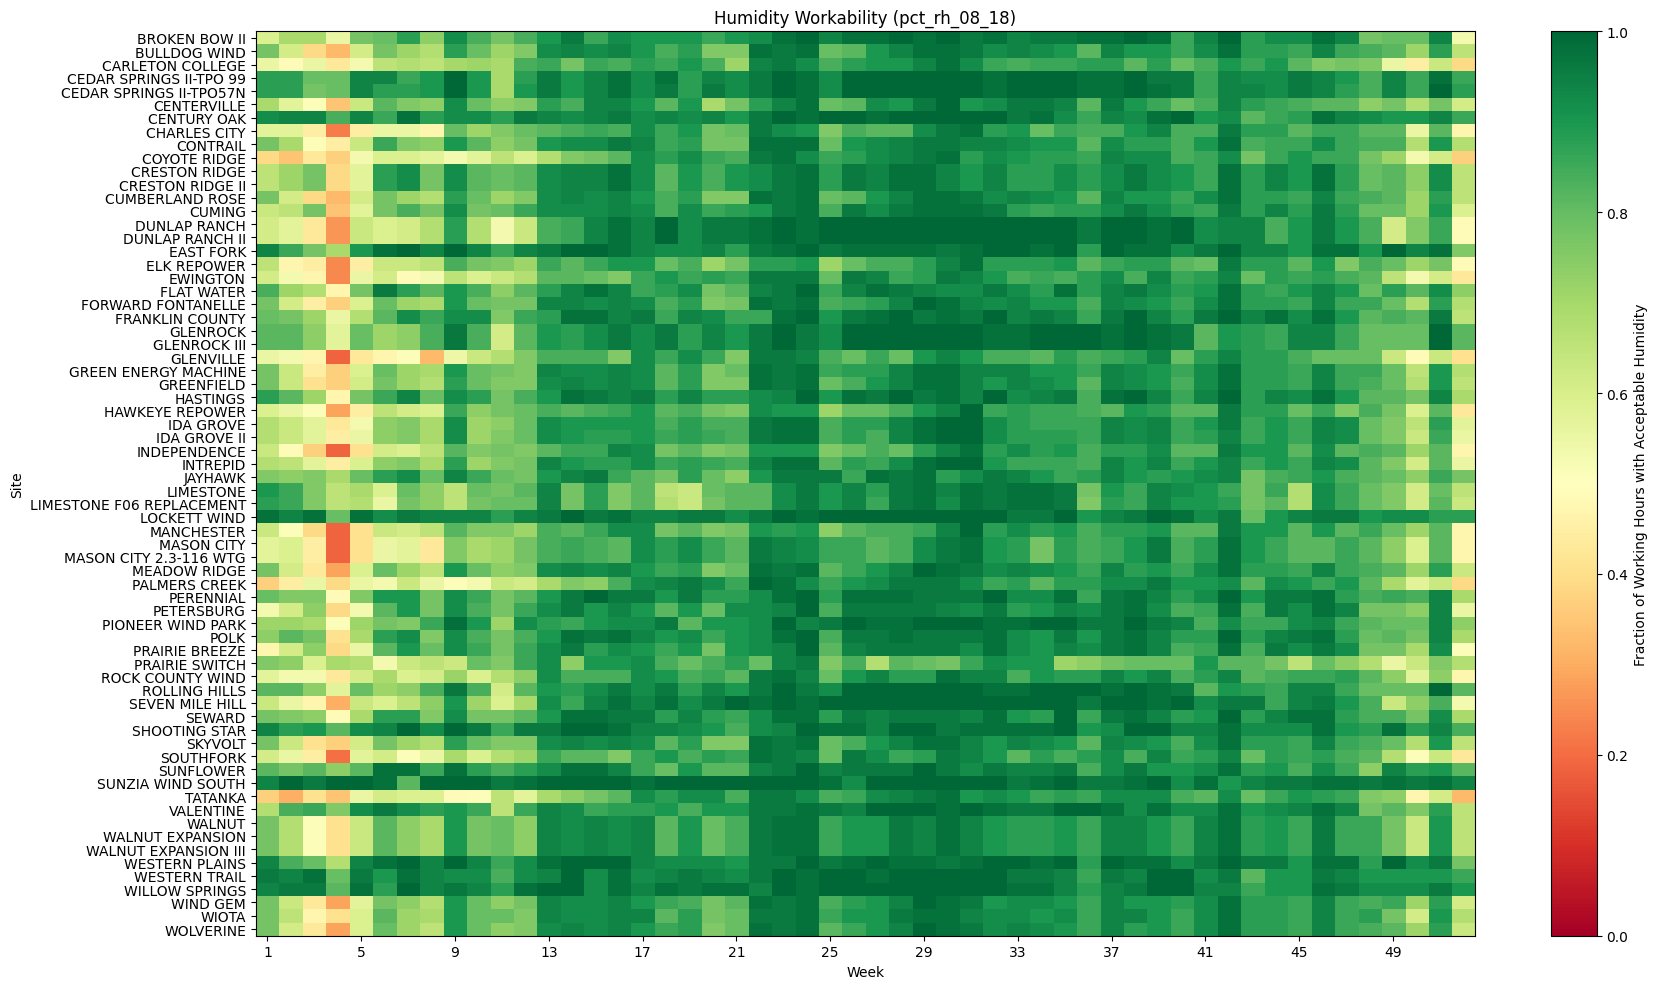

In [11]:
# -----------------------------
# PCT_RH_08_18 HEATMAP
# -----------------------------

# Load weekly metrics with site names
df = load_with_sites(kind="metrics", window="full")

# Aggregate weekly pct humidity viability
pct_rh_agg = aggregate_site_week(
    df,
    value_col="pct_rh_08_18",
    agg="mean"
)

# Build site × week matrix
pct_rh_matrix = build_site_week_matrix(
    pct_rh_agg,
    value_col="pct_rh_08_18"
)

# Ensure consistent alphabetical ordering
pct_rh_matrix = pct_rh_matrix.sort_index()

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(18, 10))

im = plt.imshow(
    pct_rh_matrix.values,
    aspect="auto",
    cmap=SUITABILITY_CMAP,  # green (good) → red (bad)
    vmin=0,
    vmax=1
)

plt.colorbar(im, label="Fraction of Working Hours with Acceptable Humidity")

plt.xticks(
    ticks=np.arange(0, pct_rh_matrix.shape[1], 4),
    labels=pct_rh_matrix.columns[::4]
)
plt.yticks(
    ticks=np.arange(pct_rh_matrix.shape[0]),
    labels=pct_rh_matrix.index
)

plt.xlabel("Week")
plt.ylabel("Site")
plt.title("Humidity Workability (pct_rh_08_18)")

plt.tight_layout()
plt.show()


DEBUG columns after normalization: ['site_id', 'year', 'week_index', 'start_date', 't2m_08', 't2m_mean_08_18', 't2m_min_08_18', 't2m_max_08_18', 't2m_absmax_08_18', 't2m_absmin_08_18', 'rh_08', 'rh_mean_08_18', 'rh_absmax_08_18', 'wind_mean', 'wind_min', 'wind_max', 'wind_absmax', 'n_obs', 'n_days', 'pct_t2m_08_18', 'pct_rh_08_18', 'pct_wind_max', 'pct_viability']


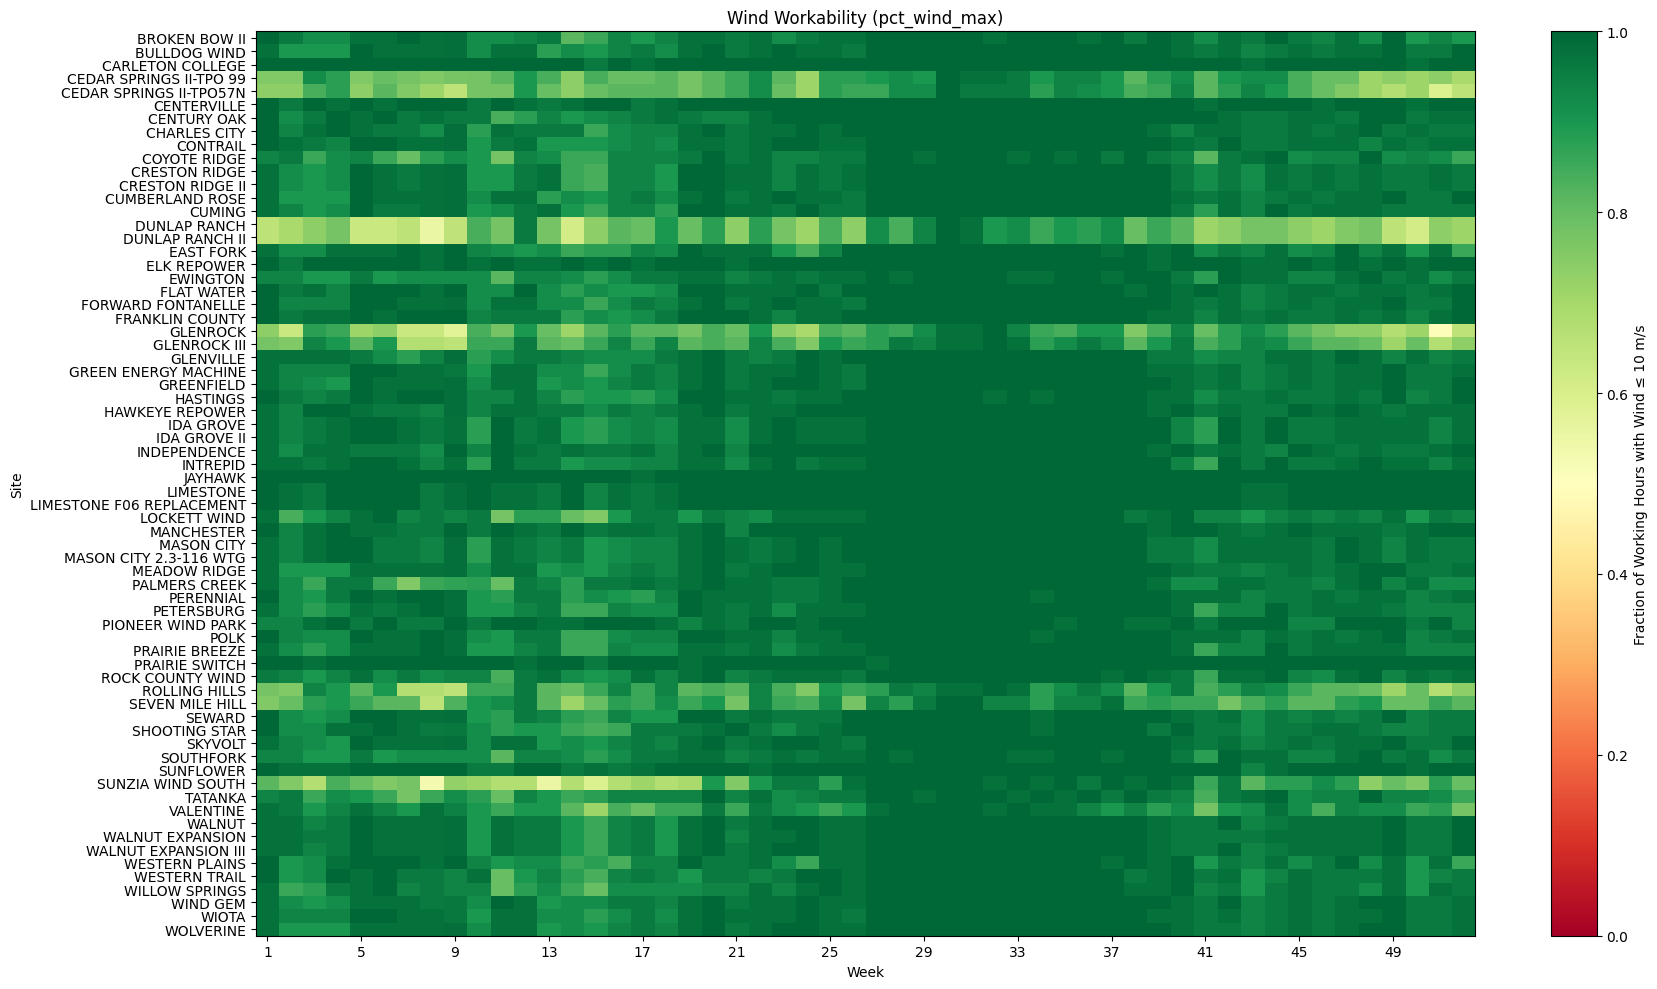

In [12]:
# -----------------------------
# PCT_WIND_MAX HEATMAP
# -----------------------------

# Load weekly metrics with site names
df = load_with_sites(kind="metrics", window="full")

# Aggregate weekly pct wind viability
pct_wind_agg = aggregate_site_week(
    df,
    value_col="pct_wind_max",
    agg="mean"
)

# Build site × week matrix
pct_wind_matrix = build_site_week_matrix(
    pct_wind_agg,
    value_col="pct_wind_max"
)

# Ensure consistent alphabetical ordering
pct_wind_matrix = pct_wind_matrix.sort_index()

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(18, 10))

im = plt.imshow(
    pct_wind_matrix.values,
    aspect="auto",
    cmap=SUITABILITY_CMAP,  # green (good) → red (bad)
    vmin=0,
    vmax=1
)

plt.colorbar(im, label="Fraction of Working Hours with Wind ≤ 10 m/s")

plt.xticks(
    ticks=np.arange(0, pct_wind_matrix.shape[1], 4),
    labels=pct_wind_matrix.columns[::4]
)
plt.yticks(
    ticks=np.arange(pct_wind_matrix.shape[0]),
    labels=pct_wind_matrix.index
)

plt.xlabel("Week")
plt.ylabel("Site")
plt.title("Wind Workability (pct_wind_max)")

plt.tight_layout()
plt.show()


DEBUG columns after normalization: ['site_id', 'year', 'week_index', 'start_date', 't2m_08', 't2m_mean_08_18', 't2m_min_08_18', 't2m_max_08_18', 't2m_absmax_08_18', 't2m_absmin_08_18', 'rh_08', 'rh_mean_08_18', 'rh_absmax_08_18', 'wind_mean', 'wind_min', 'wind_max', 'wind_absmax', 'n_obs', 'n_days', 'pct_t2m_08_18', 'pct_rh_08_18', 'pct_wind_max', 'pct_viability']


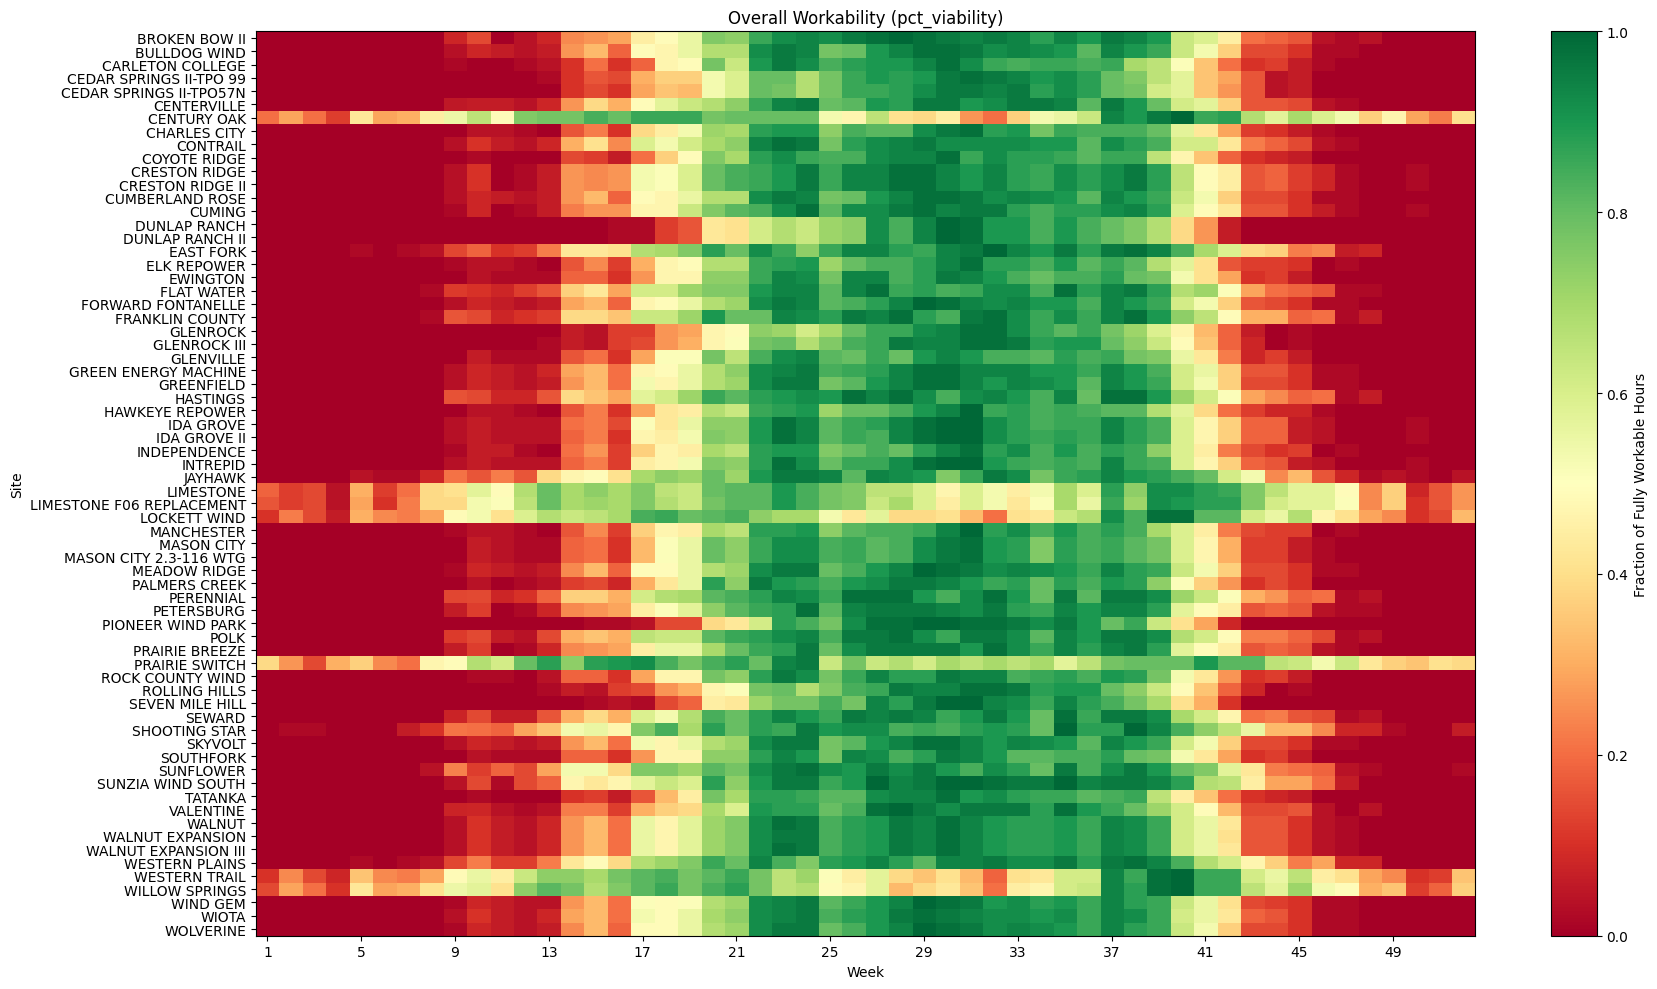

In [13]:
# -----------------------------
# PCT_VIABILITY HEATMAP
# -----------------------------

# Load weekly metrics with site names
df = load_with_sites(kind="metrics", window="full")

# Aggregate weekly overall viability
pct_v_agg = aggregate_site_week(
    df,
    value_col="pct_viability",
    agg="mean"
)

# Build site × week matrix
pct_v_matrix = build_site_week_matrix(
    pct_v_agg,
    value_col="pct_viability"
)

# Ensure consistent alphabetical ordering
pct_v_matrix = pct_v_matrix.sort_index()

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(18, 10))

im = plt.imshow(
    pct_v_matrix.values,
    aspect="auto",
    cmap=SUITABILITY_CMAP,  # green (good) → red (bad)
    vmin=0,
    vmax=1
)

plt.colorbar(im, label="Fraction of Fully Workable Hours")

plt.xticks(
    ticks=np.arange(0, pct_v_matrix.shape[1], 4),
    labels=pct_v_matrix.columns[::4]
)
plt.yticks(
    ticks=np.arange(pct_v_matrix.shape[0]),
    labels=pct_v_matrix.index
)

plt.xlabel("Week")
plt.ylabel("Site")
plt.title("Overall Workability (pct_viability)")

plt.tight_layout()
plt.show()


DEBUG columns after normalization: ['site_id', 'year', 'week_index', 'start_date', 't2m_08', 't2m_mean_08_18', 't2m_min_08_18', 't2m_max_08_18', 't2m_absmax_08_18', 't2m_absmin_08_18', 'rh_08', 'rh_mean_08_18', 'rh_absmax_08_18', 'wind_mean', 'wind_min', 'wind_max', 'wind_absmax', 'n_obs', 'n_days', 'pct_t2m_08_18', 'pct_rh_08_18', 'pct_wind_max', 'pct_viability']


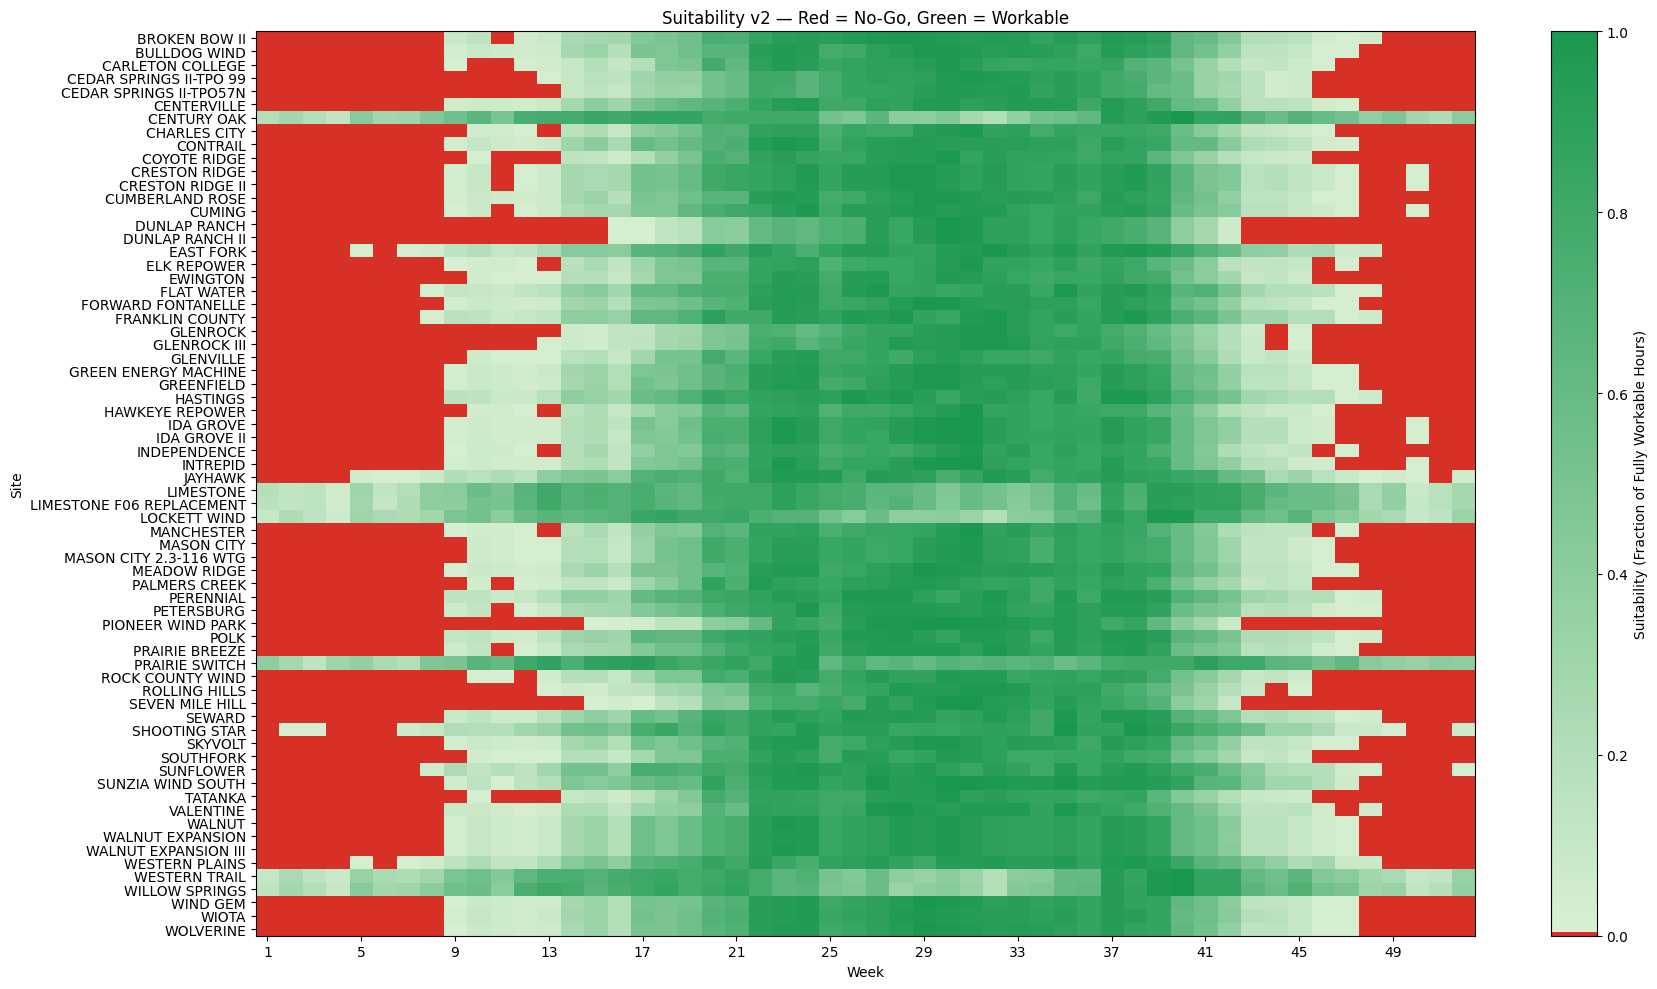

In [14]:
# -----------------------------
# SUITABILITY V2 HEATMAP (ZERO = NO-GO)
# -----------------------------

from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Custom colormap:
# 0.0 → red (no-go)
# >0.0 → light → dark green (confidence)
SUITABILITY_V2_CMAP = LinearSegmentedColormap.from_list(
    "SuitabilityV2",
    [
        (0.0, "#d73027"),   # red = no-go
        (0.001, "#d9f0d3"), # very light green = barely workable
        (1.0, "#1a9850"),   # dark green = fully workable
    ]
)

# Load weekly metrics
df = load_with_sites(kind="metrics", window="full")

# Aggregate suitability (pct_viability)
suit_agg = aggregate_site_week(
    df,
    value_col="pct_viability",
    agg="mean"
)

# Build site × week matrix
suit_matrix = build_site_week_matrix(
    suit_agg,
    value_col="pct_viability"
).sort_index()

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(18, 10))

im = plt.imshow(
    suit_matrix.values,
    aspect="auto",
    cmap=SUITABILITY_V2_CMAP,
    vmin=0,
    vmax=1
)

plt.colorbar(im, label="Suitability (Fraction of Fully Workable Hours)")

plt.xticks(
    ticks=np.arange(0, suit_matrix.shape[1], 4),
    labels=suit_matrix.columns[::4]
)
plt.yticks(
    ticks=np.arange(suit_matrix.shape[0]),
    labels=suit_matrix.index
)

plt.xlabel("Week")
plt.ylabel("Site")
plt.title("Suitability v2 — Red = No-Go, Green = Workable")

plt.tight_layout()
plt.show()


In [21]:
from app.data_loader import load_with_sites
from app.ranking import rank_by_week

def build_spatial_table(window: str, output_path: str):
    # Load raw weekly metrics
    df_raw = load_with_sites(kind="metrics", window=window)

    # Collapse to ONE row per site × week
    df = (
        df_raw
        .groupby(["site_id", "site_name", "week_bin"], as_index=False)
        .agg({
            # Environmental means
            "t2m_mean_08_18": "mean",
            "rh_mean_08_18": "mean",
            "wind_mean": "mean",

            # Absolute extremes
            "t2m_absmax_08_18": "max",
            "t2m_absmin_08_18": "min",
            "rh_absmax_08_18": "max",
            "wind_absmax": "max",

            # Suitability components
            "pct_t2m_08_18": "mean",
            "pct_rh_08_18": "mean",
            "pct_wind_max": "mean",
            "pct_viability": "mean",
        })
    )

    # Safety check
    assert df.duplicated(subset=["site_id", "week_bin"]).sum() == 0

    # Rank ONLY suitability metrics
    df = rank_by_week(df, "pct_viability", "suitability_rank", ascending=False)
    df = rank_by_week(df, "pct_t2m_08_18", "suitability_temp_rank", ascending=False)
    df = rank_by_week(df, "pct_rh_08_18", "suitability_rh_rank", ascending=False)
    df = rank_by_week(df, "pct_wind_max", "suitability_wind_rank", ascending=False)

    # Final decision fields
    df["suitability_score"] = df["pct_viability"]
    df["no_go_week"] = df["pct_viability"] == 0
    df["confidence"] = df["pct_viability"]

    # Sort (readability only)
    df = df.sort_values(["week_bin", "suitability_rank", "site_name"])

    # Save
    df.to_csv(output_path, index=False)
    print(f"✅ Saved {window} → {output_path}")

    return df


In [22]:
# Full history
build_spatial_table(
    window="full",
    output_path="/content/data/derived/weekly_spatial_full_history.csv"
)

# Last 4 years
build_spatial_table(
    window="last4y",
    output_path="/content/data/derived/weekly_spatial_last4y.csv"
)

# 2024 only
build_spatial_table(
    window="2024",
    output_path="/content/data/derived/weekly_spatial_2024.csv"
)


DEBUG columns after normalization: ['site_id', 'year', 'week_index', 'start_date', 't2m_08', 't2m_mean_08_18', 't2m_min_08_18', 't2m_max_08_18', 't2m_absmax_08_18', 't2m_absmin_08_18', 'rh_08', 'rh_mean_08_18', 'rh_absmax_08_18', 'wind_mean', 'wind_min', 'wind_max', 'wind_absmax', 'n_obs', 'n_days', 'pct_t2m_08_18', 'pct_rh_08_18', 'pct_wind_max', 'pct_viability']
✅ Saved full → /content/data/derived/weekly_spatial_full_history.csv
DEBUG columns after normalization: ['site_id', 'year', 'week_index', 'start_date', 't2m_08', 't2m_mean_08_18', 't2m_min_08_18', 't2m_max_08_18', 't2m_absmax_08_18', 't2m_absmin_08_18', 'rh_08', 'rh_mean_08_18', 'rh_absmax_08_18', 'wind_mean', 'wind_min', 'wind_max', 'wind_absmax', 'n_obs', 'n_days', 'pct_t2m_08_18', 'pct_rh_08_18', 'pct_wind_max', 'pct_viability']
✅ Saved last4y → /content/data/derived/weekly_spatial_last4y.csv
DEBUG columns after normalization: ['site_id', 'year', 'week_index', 'start_date', 't2m_08', 't2m_mean_08_18', 't2m_min_08_18', 't2m

,site_id,site_name,week_bin,t2m_mean_08_18,rh_mean_08_18,wind_mean,t2m_absmax_08_18,t2m_absmin_08_18,rh_absmax_08_18,wind_absmax,...,pct_rh_08_18,pct_wind_max,pct_viability,suitability_rank,suitability_temp_rank,suitability_rh_rank,suitability_wind_rank,suitability_score,no_go_week,confidence
2444,48,PRAIRIE SWITCH,1,13.993593,68.292919,3.162247,18.811432,6.144012,78.773424,6.158858,...,0.714286,1.000000,0.142857,1,1,3,1,0.142857,False,0.142857
0,1,BROKEN BOW II,1,-1.573504,80.247705,3.387396,2.019440,-11.331390,88.915939,7.157289,...,0.285714,1.000000,0.000000,2,2,6,1,0.000000,True,0.000000
52,2,BULLDOG WIND,1,-0.357855,68.185436,2.609826,4.367340,-7.132690,78.058693,4.701606,...,0.857143,1.000000,0.000000,2,2,2,1,0.000000,True,0.000000
104,3,CARLETON COLLEGE,1,-1.613410,65.403778,2.477675,2.640533,-6.053589,78.351341,4.275845,...,0.857143,1.000000,0.000000,2,2,2,1,0.000000,True,0.000000
156,4,CEDAR SPRINGS II-TPO 99,1,-3.060225,62.269917,3.635803,3.878326,-13.738251,71.868732,6.574000,...,1.000000,1.000000,0.000000,2,2,1,1,0.000000,True,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,62,WALNUT EXPANSION III,52,3.216049,89.121208,2.469921,9.430573,-3.972015,99.040305,5.000269,...,0.000000,1.000000,0.000000,4,5,8,1,0.000000,True,0.000000
3275,63,WESTERN PLAINS,52,8.245365,59.772821,3.432319,14.523346,-0.427338,86.350245,11.473574,...,0.714286,0.857143,0.000000,4,5,3,2,0.000000,True,0.000000
3431,66,WIND GEM,52,3.522335,91.137715,2.380963,9.829010,-2.097015,99.514999,4.333749,...,0.000000,1.000000,0.000000,4,5,8,1,0.000000,True,0.000000
3483,67,WIOTA,52,3.315253,90.137089,2.417686,9.105377,-3.479828,99.392184,4.989248,...,0.000000,1.000000,0.000000,4,5,8,1,0.000000,True,0.000000


In [23]:
import pandas as pd

# Choose which dataset to visualise
DATASET = "full"  # "full" | "last4y" | "2024"

PATHS = {
    "full": "/content/data/derived/weekly_spatial_full_history.csv",
    "last4y": "/content/data/derived/weekly_spatial_last4y.csv",
    "2024": "/content/data/derived/weekly_spatial_2024.csv",
}

df = pd.read_csv(PATHS[DATASET])

print("Loaded rows:", len(df))
df.head()


Loaded rows: 3536


,site_id,site_name,week_bin,t2m_mean_08_18,rh_mean_08_18,wind_mean,t2m_absmax_08_18,t2m_absmin_08_18,rh_absmax_08_18,wind_absmax,...,pct_rh_08_18,pct_wind_max,pct_viability,suitability_rank,suitability_temp_rank,suitability_rh_rank,suitability_wind_rank,suitability_score,no_go_week,confidence
0,48,PRAIRIE SWITCH,1,14.994778,63.144638,3.340165,28.086761,-3.914398,94.243477,9.052096,...,0.755102,1.000000,0.387755,1,1,12,1,0.387755,False,0.387755
1,7,CENTURY OAK,1,10.408590,46.112197,4.257070,24.154694,-9.108795,83.424318,9.852187,...,0.918367,1.000000,0.204082,2,3,4,1,0.204082,False,0.204082
2,35,LIMESTONE,1,11.443891,57.909427,3.698302,24.543549,-5.556610,93.933080,8.399537,...,0.897959,1.000000,0.183673,3,2,5,1,0.183673,False,0.183673
3,36,LIMESTONE F06 REPLACEMENT,1,11.375548,58.391271,3.698302,24.411713,-5.545868,94.257918,8.399537,...,0.877551,1.000000,0.163265,4,3,7,1,0.163265,False,0.163265
4,65,WILLOW SPRINGS,1,9.474949,44.884971,4.140471,25.543365,-10.139069,79.469026,10.014204,...,0.938776,0.979592,0.142857,5,4,3,2,0.142857,False,0.142857


In [24]:
from app.transforms import build_site_week_matrix

# Build matrix for suitability heatmap
plot_data = build_site_week_matrix(
    df,
    value_col="pct_viability"
)

print("Matrix shape:", plot_data.shape)
plot_data.head()


Matrix shape: (68, 52)


week_bin,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
site_name,,,,,,,,,,,,,,,,,,,,,
BROKEN BOW II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079082,0.142857,...,0.204082,0.183673,0.163265,0.040816,0.020408,0.040816,0.0,0.0,0.0,0.0
BULLDOG WIND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038265,0.081633,...,0.142857,0.142857,0.102041,0.020408,0.020408,0.000000,0.0,0.0,0.0,0.0
CARLETON COLLEGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.000000,...,0.102041,0.122449,0.061224,0.020408,0.000000,0.000000,0.0,0.0,0.0,0.0
CEDAR SPRINGS II-TPO 99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.163265,0.040816,0.061224,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
CEDAR SPRINGS II-TPO57N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.163265,0.040816,0.061224,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


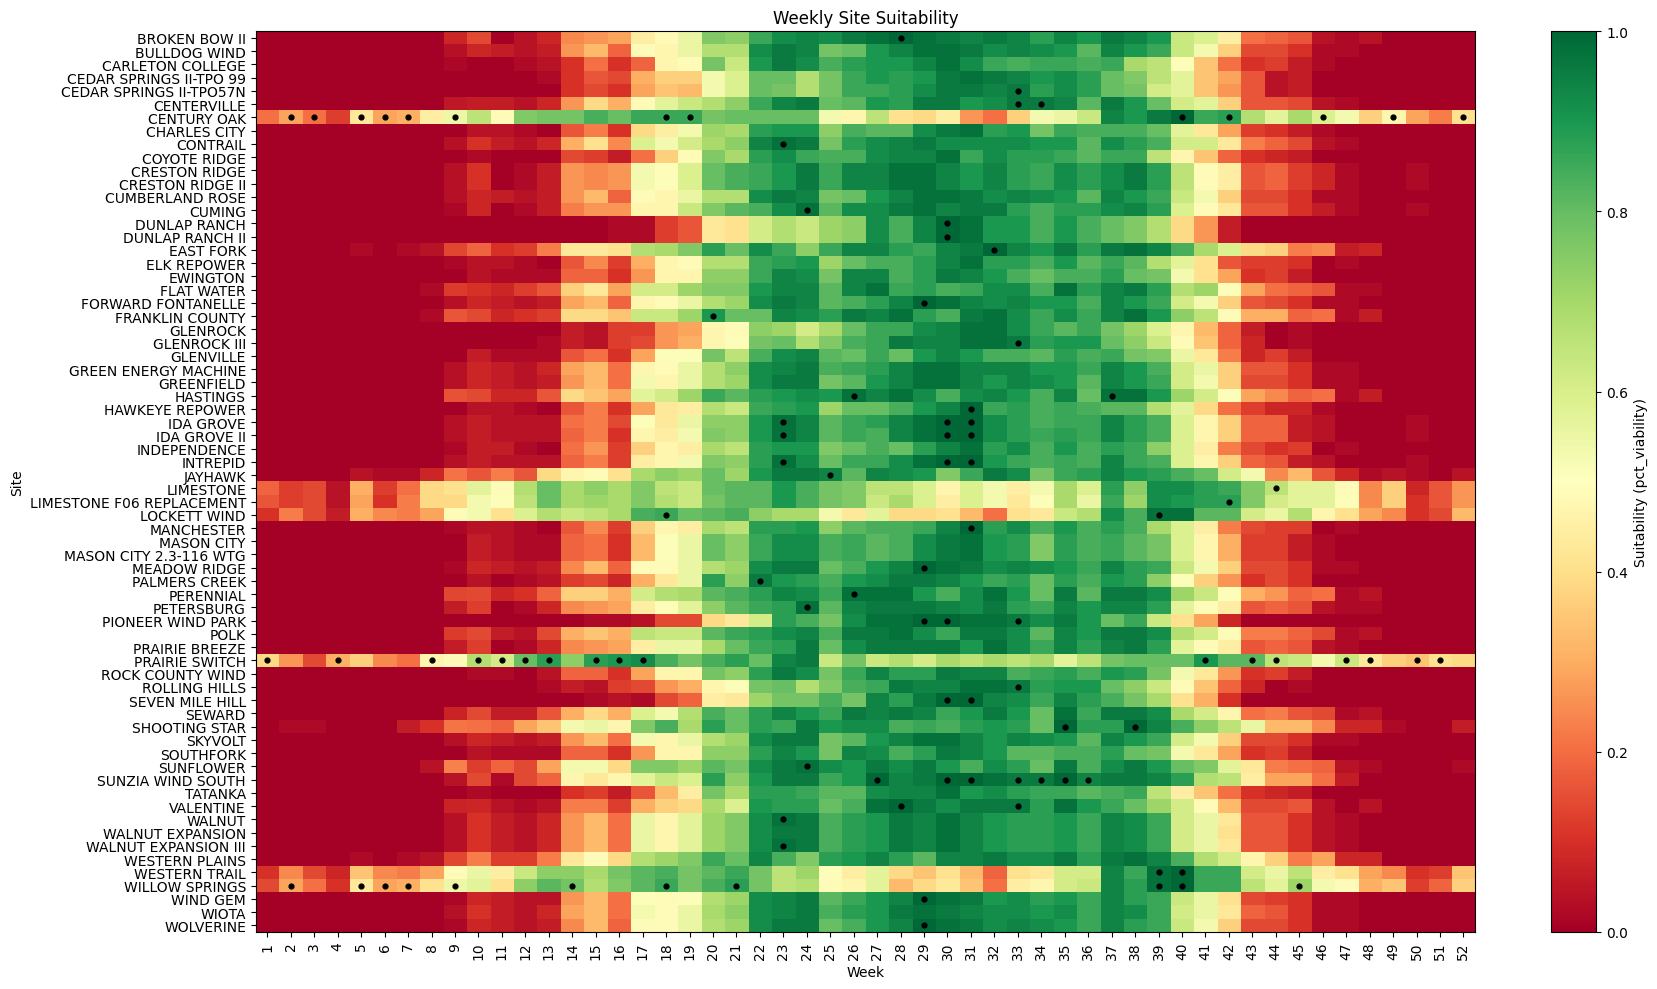

In [25]:
import matplotlib.pyplot as plt

# -----------------------------
# Controls (these become UI toggles later)
# -----------------------------
SHOW_WINNER_STRIP = True   # ← toggle ON / OFF
CMAP = "RdYlGn"            # suitability colormap

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(18, 10))

im = plt.imshow(
    plot_data.values,
    aspect="auto",
    cmap=CMAP,
    vmin=0,
    vmax=1
)

plt.colorbar(im, label="Suitability (pct_viability)")

plt.xticks(
    ticks=range(len(plot_data.columns)),
    labels=plot_data.columns,
    rotation=90
)
plt.yticks(
    ticks=range(len(plot_data.index)),
    labels=plot_data.index
)

plt.xlabel("Week")
plt.ylabel("Site")
plt.title("Weekly Site Suitability")

# -----------------------------
# Winner strip overlay (optional)
# -----------------------------
if SHOW_WINNER_STRIP:
    winners = df[df["suitability_rank"] == 1]

    for _, row in winners.iterrows():
        site = row["site_name"]
        week = row["week_bin"]

        if site in plot_data.index and week in plot_data.columns:
            y = plot_data.index.get_loc(site)
            x = plot_data.columns.get_loc(week)

            plt.scatter(
                x,
                y,
                color="black",
                s=12,
                zorder=5
            )

plt.tight_layout()
plt.show()


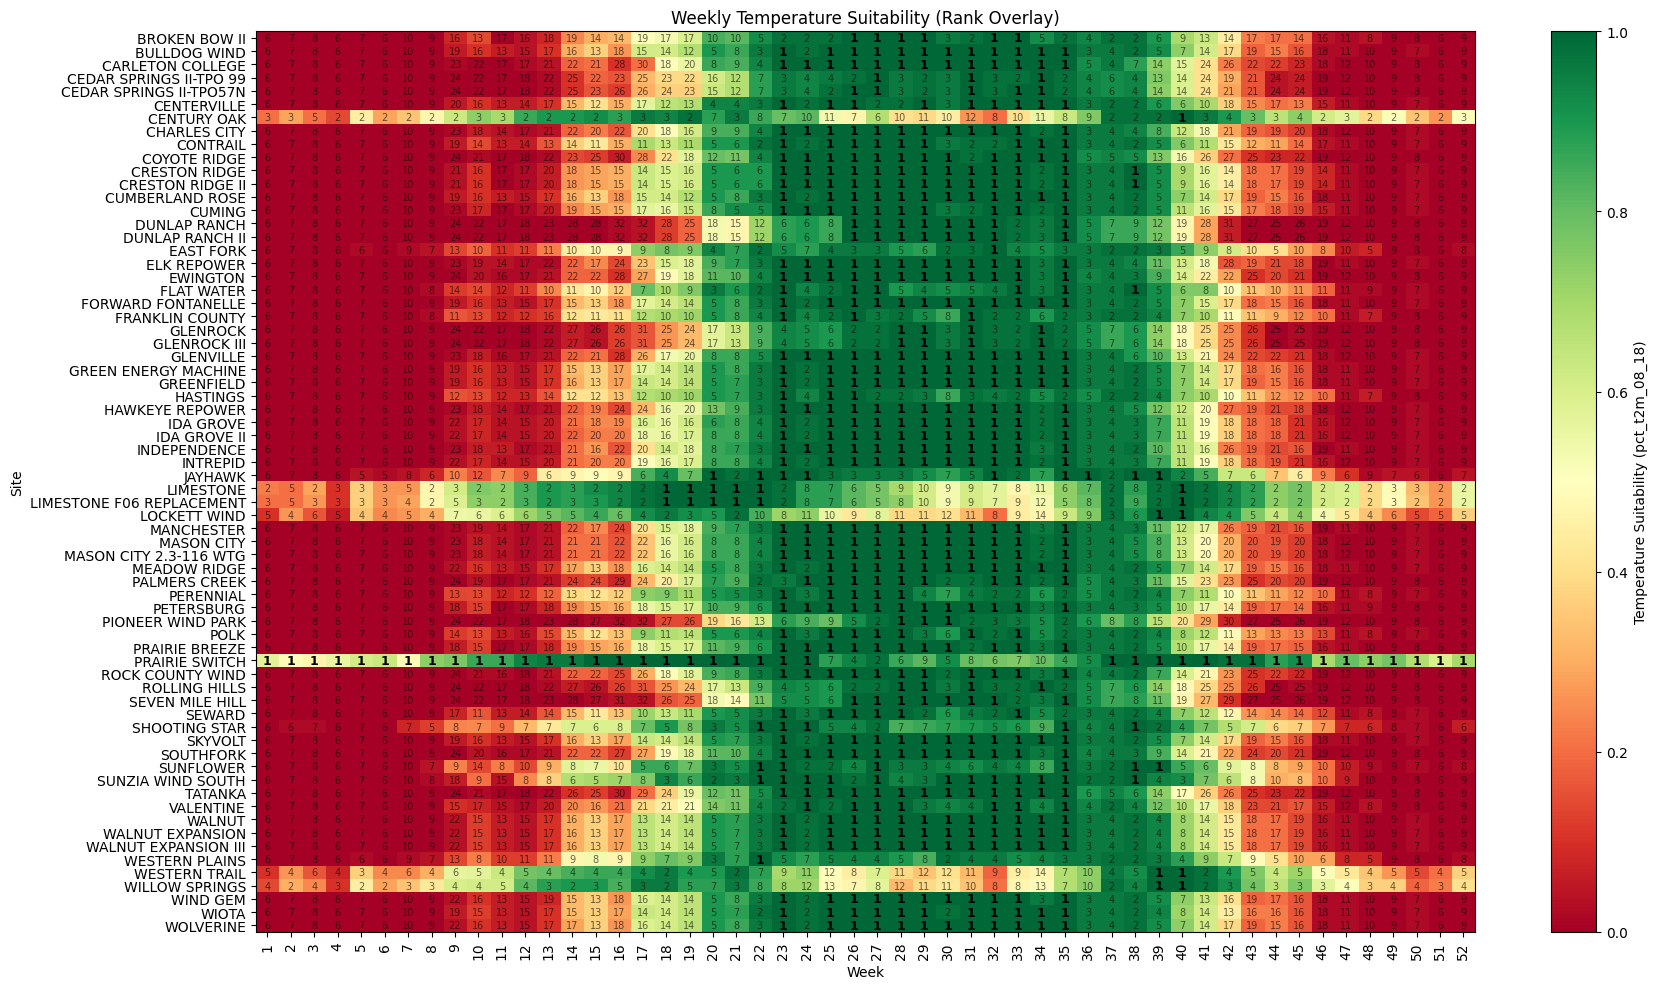

In [26]:
import matplotlib.pyplot as plt

# -----------------------------
# Build matrix
# -----------------------------
from app.transforms import build_site_week_matrix

plot_data = build_site_week_matrix(
    df,
    value_col="pct_t2m_08_18"
)

rank_data = build_site_week_matrix(
    df,
    value_col="suitability_temp_rank"
)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(18, 10))

im = plt.imshow(
    plot_data.values,
    aspect="auto",
    cmap="RdYlGn",
    vmin=0,
    vmax=1
)

plt.colorbar(im, label="Temperature Suitability (pct_t2m_08_18)")

plt.xticks(range(len(plot_data.columns)), plot_data.columns, rotation=90)
plt.yticks(range(len(plot_data.index)), plot_data.index)

plt.xlabel("Week")
plt.ylabel("Site")
plt.title("Weekly Temperature Suitability (Rank Overlay)")

# -----------------------------
# Rank overlay (bold rank 1)
# -----------------------------
for y, site in enumerate(plot_data.index):
    for x, week in enumerate(plot_data.columns):
        rank = rank_data.loc[site, week]

        if not pd.isna(rank):
            if rank == 1:
                plt.text(
                    x, y, "1",
                    ha="center", va="center",
                    fontsize=9,
                    fontweight="bold",
                    color="black"
                )
            else:
                plt.text(
                    x, y, int(rank),
                    ha="center", va="center",
                    fontsize=7,
                    color="black",
                    alpha=0.6
                )

plt.tight_layout()
plt.show()


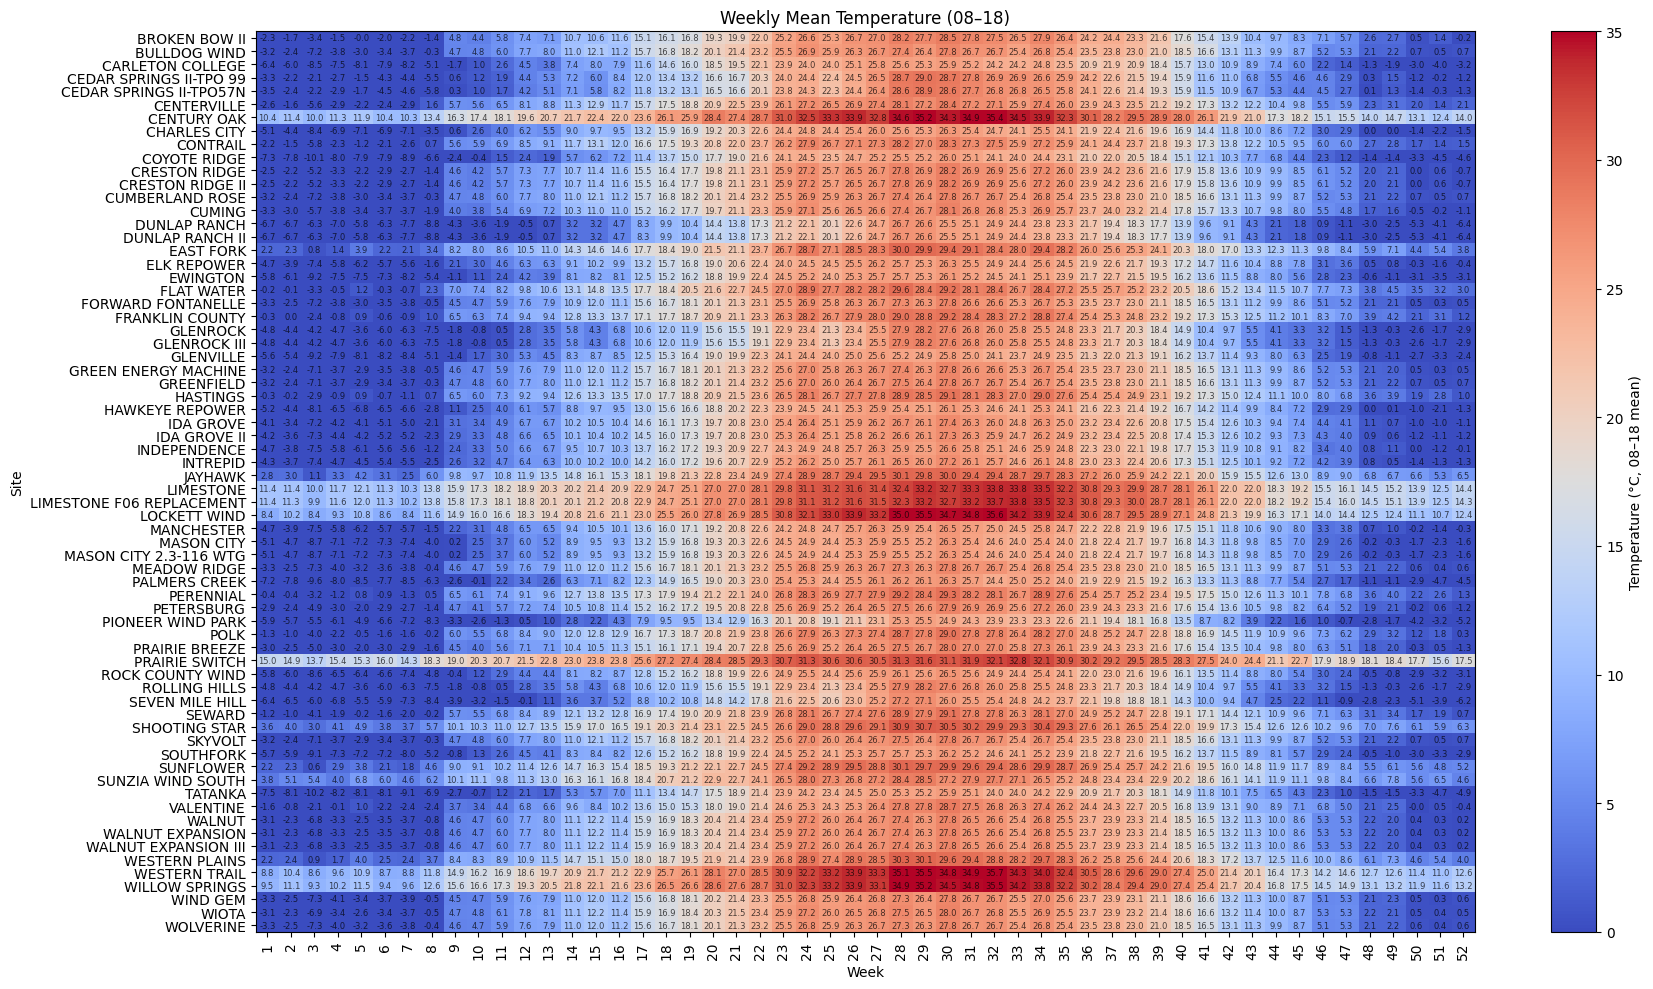

In [27]:
import matplotlib.pyplot as plt

# -----------------------------
# Build matrix
# -----------------------------
plot_data = build_site_week_matrix(
    df,
    value_col="t2m_mean_08_18"
)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(18, 10))

im = plt.imshow(
    plot_data.values,
    aspect="auto",
    cmap="coolwarm",
    vmin=0,
    vmax=35
)

plt.colorbar(im, label="Temperature (°C, 08–18 mean)")

plt.xticks(range(len(plot_data.columns)), plot_data.columns, rotation=90)
plt.yticks(range(len(plot_data.index)), plot_data.index)

plt.xlabel("Week")
plt.ylabel("Site")
plt.title("Weekly Mean Temperature (08–18)")

# -----------------------------
# Value overlay
# -----------------------------
for y, site in enumerate(plot_data.index):
    for x, week in enumerate(plot_data.columns):
        val = plot_data.loc[site, week]

        if not pd.isna(val):
            plt.text(
                x, y, f"{val:.1f}",
                ha="center", va="center",
                fontsize=6,
                color="black",
                alpha=0.7
            )

plt.tight_layout()
plt.show()


In [28]:
!zip -r content_full_backup.zip /content


  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/default_configs.db (deflated 98%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
  adding: content/.config/.last_update_check.json (deflated 24%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2025.12.11/ (stored 0%)
  adding: content/.config/logs/2025.12.11/14.34.12.303029.log (deflated 58%)
  adding: content/.config/logs/2025.12.11/14.34.39.029902.log (deflated 57%)
  adding: content/.config/logs/2025.12.11/14.34.2